# Using the `autocuts` Algorithm
_____
This is a quick look at how to use the `autocuts` algorithm.

Note that there are many more optional arguments than what are shown here. For example, you can choose which cuts to do, change the outlier algorithm used, or indicate that you are cutting on dIdV data.

First, let's import the function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycdms.detcal.misc.cut import autocuts
from pycdms.detcal.misc.utils import calc_psd

Now, let's load the data.

In [2]:
pathtodata = "test_autocuts_data.npy"
traces = np.load(pathtodata)
fs = 625e3

Let's look at the PSD before the cuts, to get a sense of the change.

In [3]:
f, psd = calc_psd(traces, fs=fs, folded_over=True)

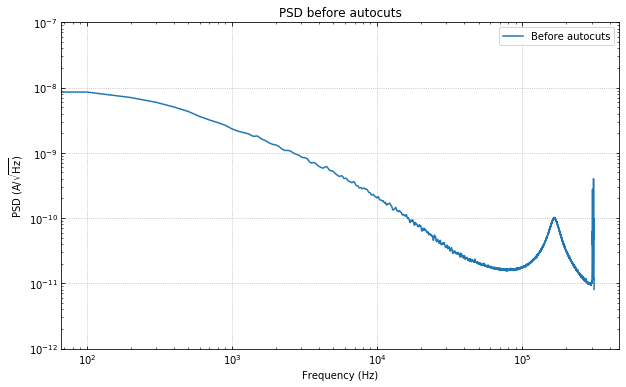

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
ax.loglog(f, np.sqrt(psd), label="Before autocuts")
ax.set_ylim([1e-12,1e-7])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('PSD (A/$\sqrt{\mathrm{Hz}}$)')
ax.set_title("PSD before autocuts")
ax.legend(loc="upper right")
ax.grid(linestyle='dotted')
ax.tick_params(which='both',direction='in',right=True,top=True)

Apply the autocuts function.

In [5]:
?autocuts

In [6]:
cut = autocuts(traces, fs=fs)
print(f"The cut efficiency is {np.sum(cut)/len(traces)}.")

The cut efficiency is 0.488.


Let's compare the PSD after the cuts, we should see the noise go down by a fair amount.

In [7]:
psd_cut = calc_psd(traces[cut], fs=fs, folded_over=True)[1]

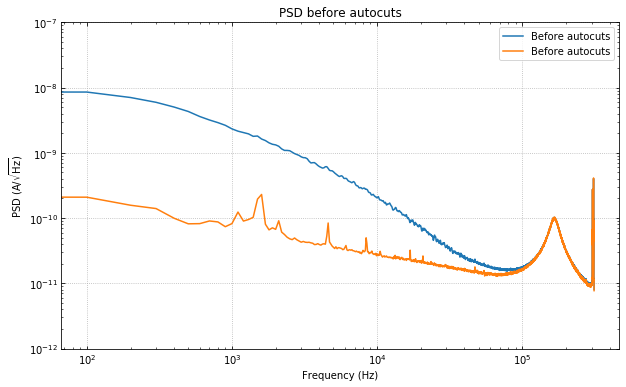

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.loglog(f, np.sqrt(psd), label="Before autocuts")
ax.loglog(f, np.sqrt(psd_cut), label="Before autocuts")
ax.set_ylim([1e-12,1e-7])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('PSD (A/$\sqrt{\mathrm{Hz}}$)')
ax.set_title("PSD before autocuts")
ax.legend(loc="upper right")
ax.grid(linestyle='dotted')
ax.tick_params(which='both',direction='in',right=True,top=True)

The change is huge! Which makes sense, as we have removed many of the pulses, muon tails, etc. Please note that there may still be "bad" traces in the data, as the autocuts function is not perfect. There may be more cuts that one would like to do that are more specific to the dataset.